# Waypoint surveying with behaviour trees

In [1]:
import pygmo as pg, numpy as np, matplotlib.pyplot as plt, sys; sys.path.append("../src/")

# Farm environment

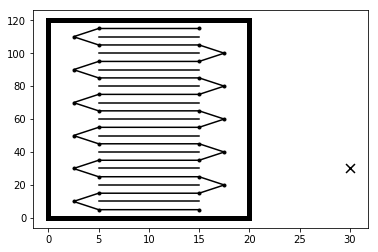

In [2]:
from farm import Farm

# padding between walls and farm border
dx, dy = 5, 10

# wall seperation
dw = 10

# wall length
lx = 10

# number of walls
N = 3

# dock coordinates
ds = [30, 30]

# instantiate farm
farm = Farm(dx, dy, dw, lx, N, *ds)

# compute sequenced coverage way points
waypoints = np.vstack((ds, farm.simple_coverage(), ds))

# visualise
farm.plot()
plt.show()

## Dynamics
$
\dot{\boldsymbol{s}} =
\left[\begin{matrix}v_{x} & v_{y} & \frac{T u_{x}}{m} u_{t} & \frac{T u_{y}}{m} u_{t}\end{matrix}\right] ^\intercal
$

In [3]:
from dynamics import Dynamics

# maximum thrust [N]
thrust = 5

# mass [kg]
mass = 25

# instantiate AUV
AUV = Dynamics(thrust, mass)
AUV.alpha = 0

## Trajectory

In [4]:
from trajectory import Indirect

# inirect trajectory
traj = Indirect(AUV)
traj.parallel = True

# assemble bounds
slb = np.hstack((waypoints, np.full((len(waypoints), 2), 0)))
sub = np.hstack((waypoints, np.full((len(waypoints), 2), 0)))
Tlb, Tub = 1, 1500

# set trajectory
traj.set_bounds(Tlb, Tub, slb, sub)

In [5]:
from pathos.multiprocessing import ProcessingPool as Pool
traj.segments = Pool(8).map(lambda seg: seg.solve(), traj.segments)


In [6]:
traj.process_records()

In [7]:
%matplotlib
# trajectory plot    
fig, ax = plt.subplots(1)
ax.plot(traj.states[:, 0], traj.states[:, 1], "k.-")
farm.plot(ax)
plt.show()

Using matplotlib backend: Qt5Agg


In [10]:
%matplotlib

# statewise plot
fig, ax = plt.subplots(AUV.sdim*2)
for i in range(AUV.sdim*2):
    ax[i].plot(traj.states[:, i], "k.-")
    
# trajectory plot    
fig, ax = plt.subplots(1)
ax.plot(traj.states[:, 0], traj.states[:, 1], "k.-")
farm.plot(ax)

# controls plot    
fig, ax = plt.subplots(AUV.udim)
[ax[i].plot(traj.controls[:, i], "k.-") for i in range(AUV.udim)]
    
plt.show()

Using matplotlib backend: Qt5Agg


In [ ]:
waypoints

In [ ]:
zopt